In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import os
import csv
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [3]:
os.chdir('/Users/ruddysimonpour/Desktop/gun-violance/sources')
resource = pd.read_csv("gun-violence-data_01-2013_03-2018.csv", parse_dates=[0], low_memory=False)

In [4]:
data = pd.DataFrame(resource)
data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

In [5]:
# Delete the columns that are not required
gun_data = data.drop(columns={"incident_url",
                                     "source_url",
                                     "incident_url_fields_missing",
                                     "congressional_district",
                                     "gun_stolen",
                                     "participant_relationship",
                                     "state_senate_district",
                                     "state_house_district",
                                     "sources"},axis = 1)



In [6]:
gun_data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,0::Unknown,Shots Fired - No Injuries,NaN,NaN,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,"0::Unharmed, Arrested",0::Subject-Suspect
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,Shop Rite,-93.0836,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,0::Unknown,Shot - Wounded/Injured,29.9239,NaN,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,NaN,0::Injured,0::Victim
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)",29.7201,Vanderbilt Court apartments,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,0::Killed,0::Victim


In [7]:
# Check Null Values in Dataset
# gun_data.isna().sum()

#### Break apart the Date
breaking apart the date to year, month and day in order to analysis the gun violance for each field

In [8]:
# Lets break apart the Date into more date fields
gun_data["date"] = pd.to_datetime(gun_data["date"])
# gun_data.dtypes
gun_data["year"] = gun_data["date"].dt.year
gun_data["month"] = gun_data["date"].dt.month
gun_data["day"] = gun_data["date"].dt.day


### Create tables for gun violance incidents by year and month


In [9]:
incident_year = gun_data.groupby("year").count()["incident_id"]
incident_df = pd.DataFrame(incident_year)
incident_df.reset_index()


,year,incident_id
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802


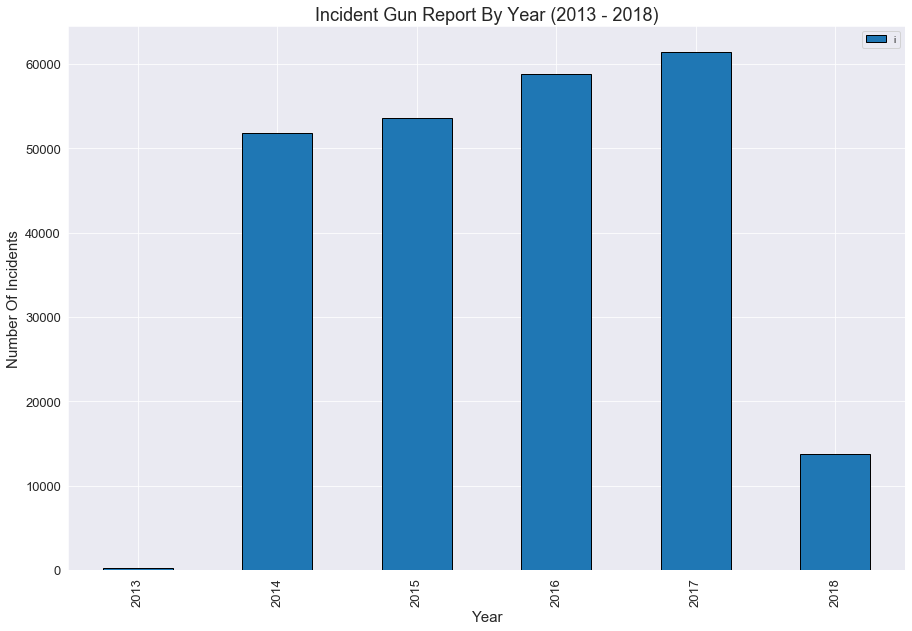

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
incident_df = incident_df.plot(kind = 'bar', width = 0.5, align = 'center',color = color, edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("incident count")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Number Of Incidents",fontsize = 15)
plt.title("Incident Gun Report By Year (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()

#### Regarding to the chart above we have lack of data for 2013. At first look, apparently incidents are increasing in the last five years.

In [11]:
incident_month = gun_data.groupby("month").count()["incident_id"]
month_df = pd.DataFrame(incident_month)
month_df.reset_index()


,month,incident_id
0,1,23091
1,2,18841
2,3,22640
3,4,18628
4,5,19930
5,6,18755
6,7,21126
7,8,21040
8,9,19656
9,10,19890


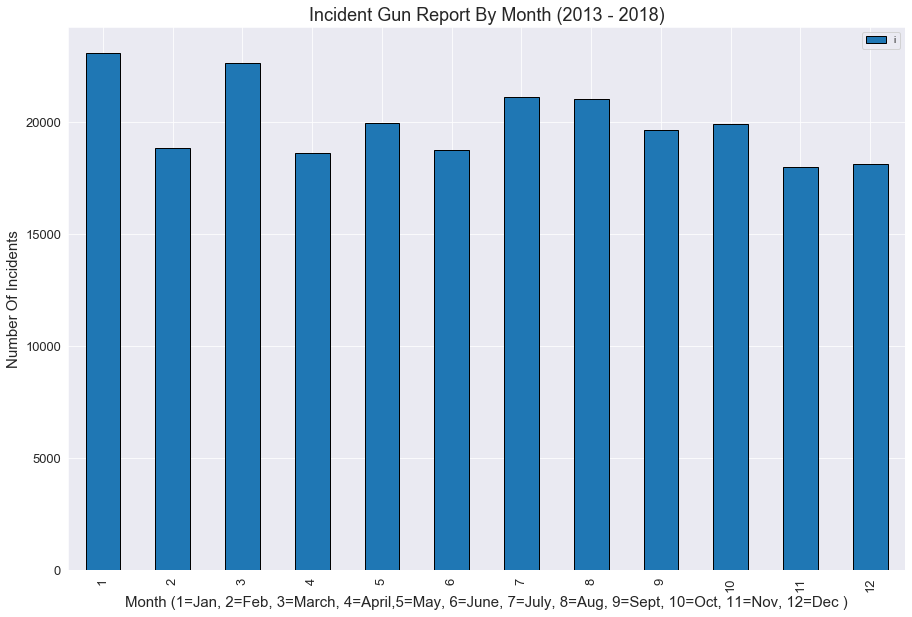

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
month_df = month_df.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("incident count")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Month (1=Jan, 2=Feb, 3=March, 4=April,5=May, 6=June, 7=July, 8=Aug, 9=Sept, 10=Oct, 11=Nov, 12=Dec )",fontsize = 15)
plt.ylabel("Number Of Incidents",fontsize = 15)
plt.title("Incident Gun Report By Month (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()

In [13]:
yearly_killed = gun_data.groupby("year").sum()["n_killed"]
killed_ydf = pd.DataFrame(yearly_killed)
killed_ydf.reset_index()

,year,n_killed
0,2013,317
1,2014,12557
2,2015,13484
3,2016,15066
4,2017,15511
5,2018,3533


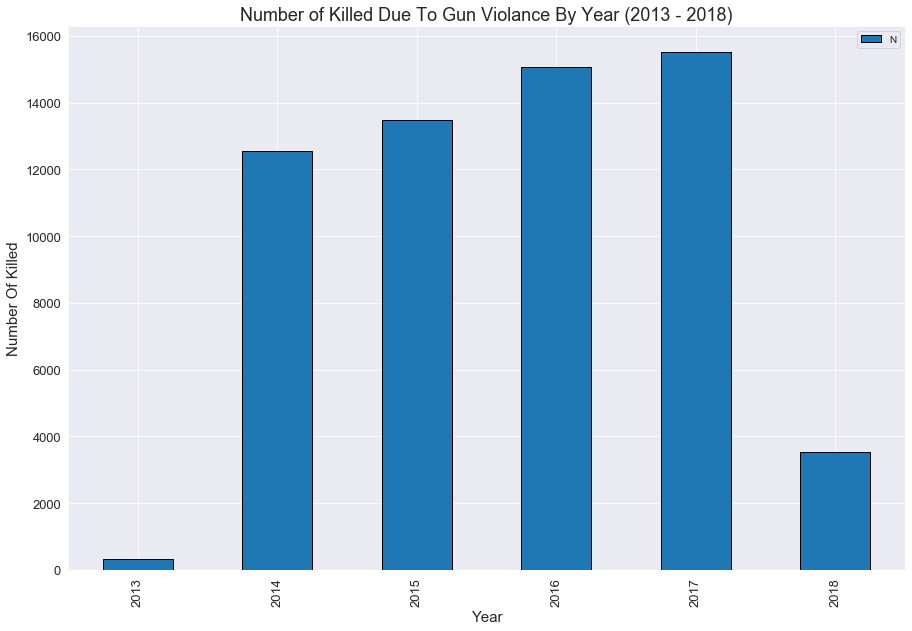

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
killed_ydf = killed_ydf.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number Of killed")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Number Of Killed",fontsize = 15) 
plt.title("Number of Killed Due To Gun Violance By Year (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()


In [15]:
yearly_injured = gun_data.groupby("year").sum()["n_injured"]
injured_ydf = pd.DataFrame(yearly_injured)
injured_ydf.reset_index()

,year,n_injured
0,2013,979
1,2014,23002
2,2015,26967
3,2016,30580
4,2017,30703
5,2018,6171


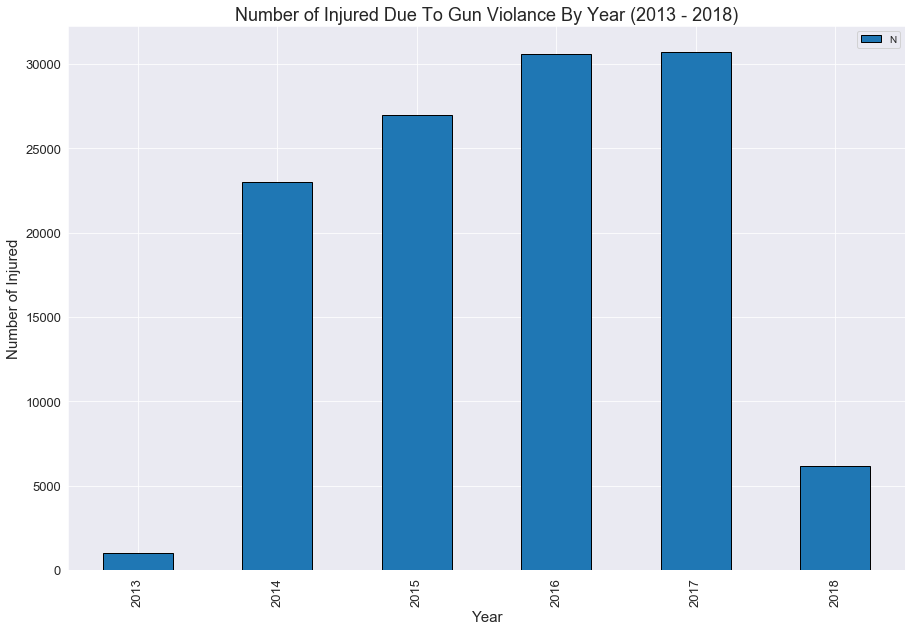

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
injured_ydf = injured_ydf.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Injured")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Number of Injured",fontsize = 15)
plt.title("Number of Injured Due To Gun Violance By Year (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()


In [17]:
monthly_killed = gun_data.groupby("month").sum()["n_killed"]
killed_mdf = pd.DataFrame(monthly_killed)
killed_mdf.reset_index()

,month,n_killed
0,1,6035
1,2,4945
2,3,5641
3,4,4383
4,5,4830
5,6,4886
6,7,5276
7,8,5127
8,9,4779
9,10,4791


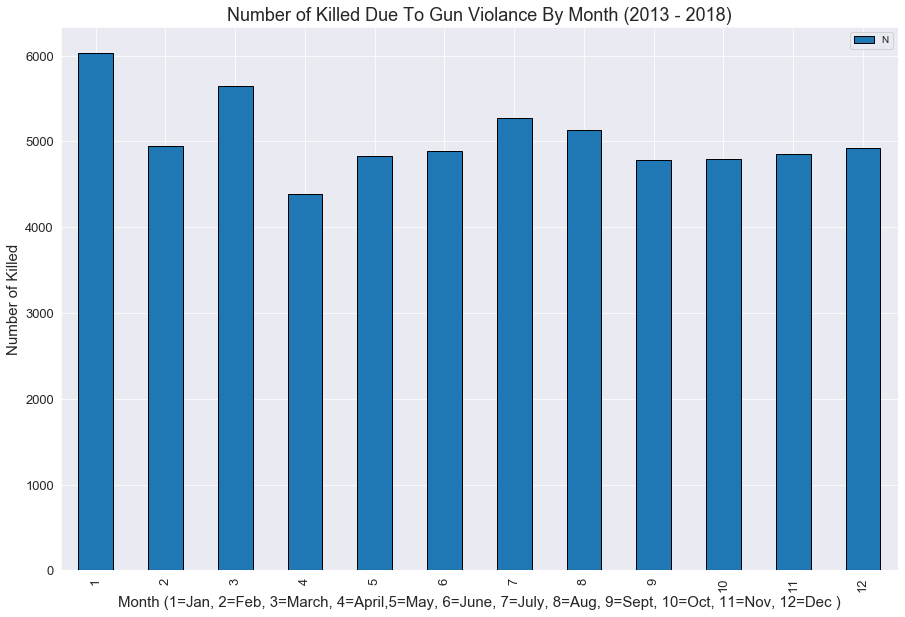

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
killed_mdf = killed_mdf.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Killed")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Month (1=Jan, 2=Feb, 3=March, 4=April,5=May, 6=June, 7=July, 8=Aug, 9=Sept, 10=Oct, 11=Nov, 12=Dec )",fontsize = 15)
plt.ylabel("Number of Killed",fontsize = 15)
plt.title("Number of Killed Due To Gun Violance By Month (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()

In [19]:
monthly_injured = gun_data.groupby("month").sum()["n_injured"]
injured_mdf = pd.DataFrame(monthly_injured)
injured_mdf.reset_index()

,month,n_injured
0,1,10946
1,2,8420
2,3,10475
3,4,8907
4,5,10244
5,6,9797
6,7,11259
7,8,10809
8,9,9766
9,10,9756


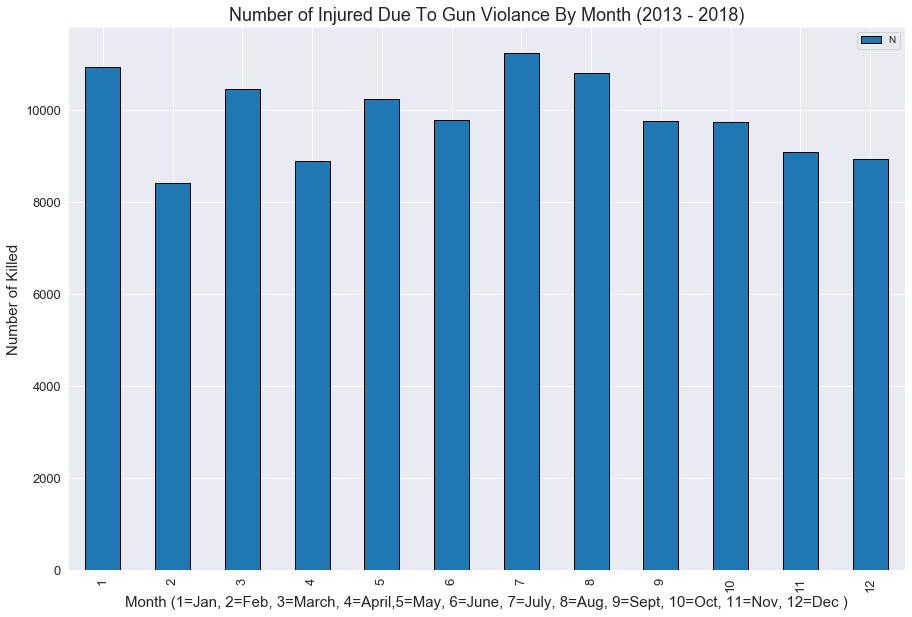

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
injured_mdf = injured_mdf.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Injured")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Month (1=Jan, 2=Feb, 3=March, 4=April,5=May, 6=June, 7=July, 8=Aug, 9=Sept, 10=Oct, 11=Nov, 12=Dec )",fontsize = 15)
plt.ylabel("Number of Killed",fontsize = 15)
plt.title("Number of Injured Due To Gun Violance By Month (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()

### Gun Violence States
We are looking for gun violence in different States in order to find is there any correlation between number of people who killed and injured to different states 


In [21]:
gun_data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_type,incident_characteristics,latitude,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,year,month,day
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,1,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1,5
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,0::Unknown,Shots Fired - No Injuries,NaN,...,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,"0::Unharmed, Arrested",0::Subject-Suspect,2018,3,31
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,...,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,2018,3,31
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,0::Unknown,Shot - Wounded/Injured,29.9239,...,NaN,0::21,0::Adult 18+,0::Male,NaN,0::Injured,0::Victim,2018,3,31
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)",29.7201,...,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,0::Killed,0::Victim,2018,3,31


### Number of killed people in US states

In [22]:
killed_states = gun_data.groupby('state').sum()["n_killed"]
n_killed_states = pd.DataFrame(killed_states)

n_killed_states.sort_values(["n_killed"],ascending = False)
# save as csv file
n_killed_states.to_csv('states_killed1.csv', encoding='utf-8')

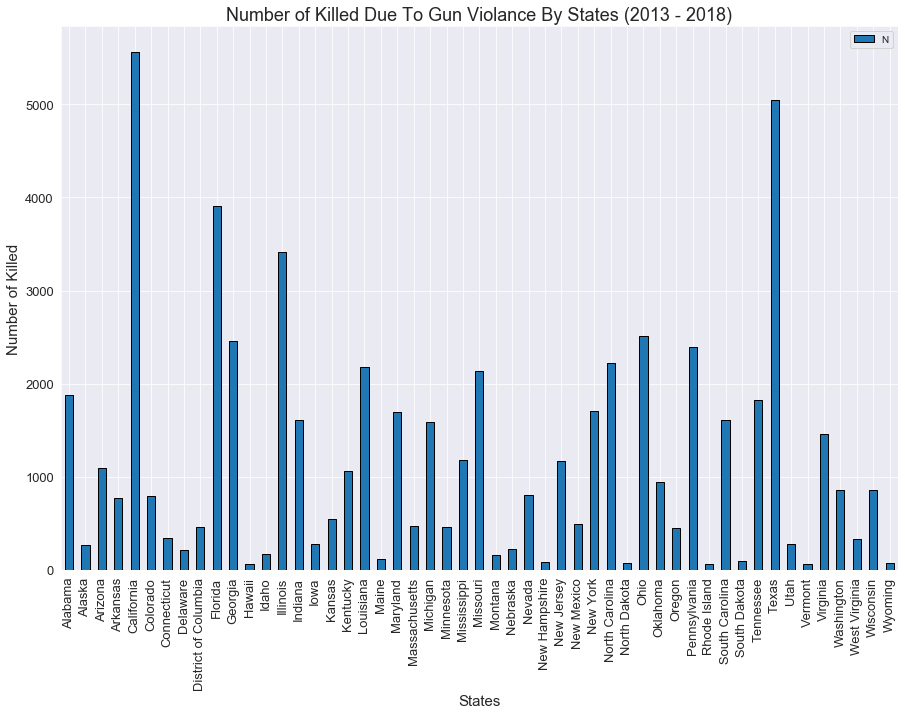

<Figure size 432x288 with 0 Axes>

In [23]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
n_killed_states = n_killed_states.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Killed")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("States",fontsize = 15)
plt.ylabel("Number of Killed",fontsize = 15)
plt.title("Number of Killed Due To Gun Violance By States (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()


In [24]:
injured_states = gun_data.groupby("state").sum()["n_injured"]
n_injured_states = pd.DataFrame(injured_states)
n_injured_states.sort_values(by = ["n_injured"],ascending = False)
n_injured_states
stateinjur = n_injured_states
stateinjur.reset_index()
n_injured_states.to_csv('states_injured.csv', encoding='utf-8')

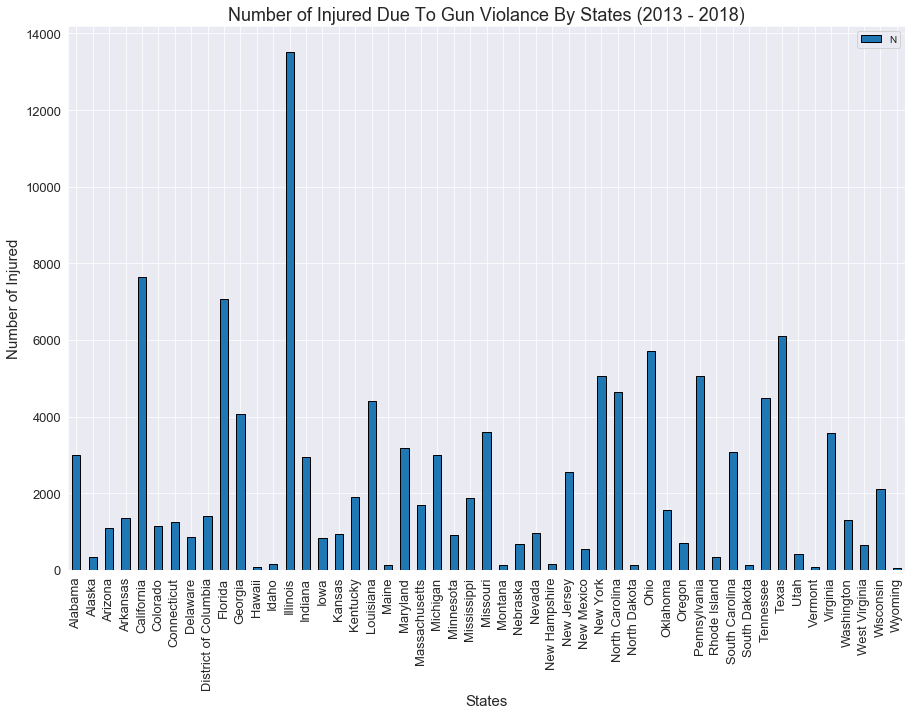

<Figure size 432x288 with 0 Axes>

In [25]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
injured_states = injured_states.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Injured")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("States",fontsize = 15)
plt.ylabel("Number of Injured",fontsize = 15)
plt.title("Number of Injured Due To Gun Violance By States (2013 - 2018)",fontsize = 18)

plt.show()
plt.tight_layout()


### Top 10 States in killings and injuries

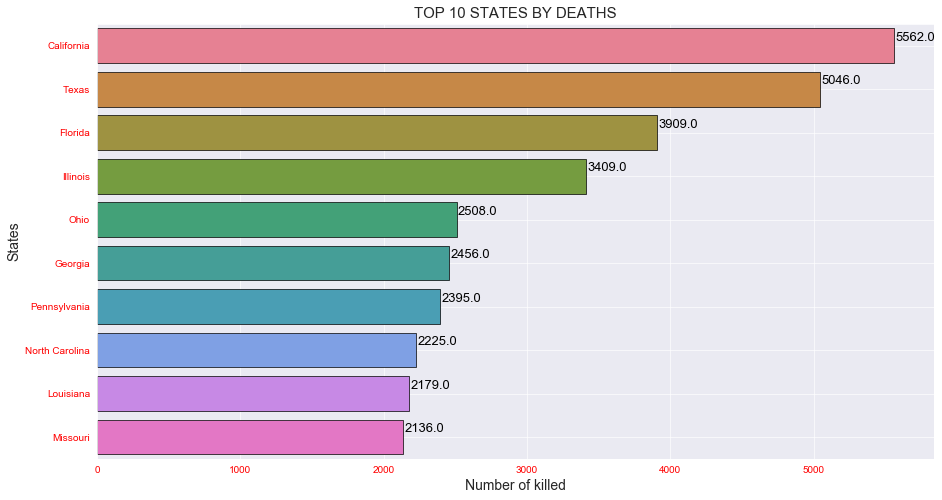

In [26]:
kill_states = gun_data.groupby("state")["n_killed"].sum().reset_index().sort_values(by="n_killed",ascending=False)

fig = plt.figure(figsize=(15,8))
plt.subplot()
ax = sns.barplot("n_killed","state",
                 data=kill_states[:10],palette="husl",linewidth=0.7,edgecolor = "k")
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.ylabel("States",fontsize=14)
plt.xlabel("Number of killed",fontsize=14)
plt.title("TOP 10 STATES BY DEATHS",fontsize=15)
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+.28, \
           str(round((i.get_width()),1 )), fontsize = 13,color = "black")
plt.grid(True,alpha= .8)

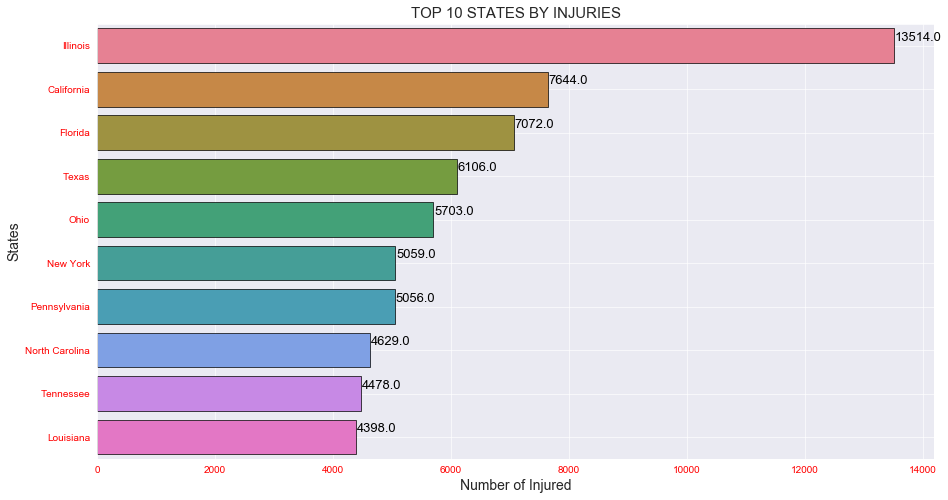

In [27]:
injury_states = gun_data.groupby("state")["n_injured"].sum().reset_index().sort_values(by="n_injured",ascending=False)

fig = plt.figure(figsize = (15,8))
ax = sns.barplot("n_injured","state",
                 data=injury_states[:10],palette="husl",linewidth=0.7,edgecolor = "k")
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.ylabel("States",fontsize=14)
plt.xlabel("Number of Injured",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 10 STATES BY INJURIES",fontsize=15)
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+.28, \
           str(round((i.get_width()),1 )), fontsize = 13,color = "black")
plt.grid(True,alpha= .8)

### Line graph for number of killed and number of injured people (2014-2018)

In [28]:
yearly_incident=gun_data.groupby(['year'])['n_killed','n_injured'].sum()


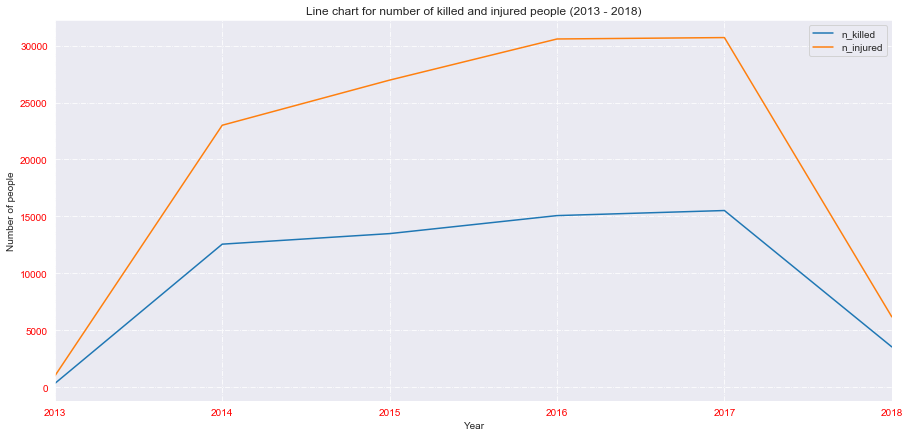

In [29]:
ax = yearly_incident.plot(figsize = (15,7))
ax.set(xlabel='Year')
ax.set(ylabel = "Number of people")
ax.set(title = "Line chart for number of killed and injured people (2013 - 2018)")
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)


# Incident types 
We have different types of gun violence and we categorized them into: 1-Suicide /
                                                                      2-Accidental Shooting / 
                                                                      3-Domestic violence / 
                                                                      4-Robbery and assault /

### Suicide
There is a strong relationship between guns in the home, as well as access to guns more generally, and suicide risk, the evidence for which is strongest in the United States, according to the https://en.wikipedia.org/wiki/Gun_violence

In [30]:
gun_data["Suicide"] = gun_data["incident_characteristics"].str.contains("Suicide") * 1

### Accidental shooting deaths
In the past there is clear evidence that accidental shooting, due to barring fire arms, which resulted in multipile deaths.

In [31]:
gun_data["Accidental Deaths"] = gun_data["incident_characteristics"].str.contains("Accidental Shooting") * 1

### Domestic Violence
There is strong evidence linking availibility of guns to deaths and injuries; all found in domestic violence studies.
Domestic abuse includes, any attempt by a person in a close relationship to dominate or obtain control over the other person or significant other.

In [32]:
gun_data["Domestic Violence"] = gun_data["incident_characteristics"].str.contains("Domestic Violence") * 1

### Robbery and assault
Robbey and Assault are two different categoriations. As for Robbery,it is known as the act of stealing property by force or threart of force. On the other hand, Assault is the act of physically attacking someone resulting in serious body injury. Hence, in certrain cases assaulting another person may result in killing another person, both intentially or unintentially. 


In [33]:
gun_data["Robbery and Assault"] = gun_data["incident_characteristics"].str.contains("Armed robbery") * 1

In [34]:
gun_data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_type,incident_characteristics,latitude,...,participant_name,participant_status,participant_type,year,month,day,Suicide,Accidental Deaths,Domestic Violence,Robbery and Assault
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1,1,0,0,0,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1,1,0,0,0,0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,1,1,0,0,0,0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1,5,0,0,0,0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1,7,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,0::Unknown,Shots Fired - No Injuries,NaN,...,0::Jhkeya Tezeno,"0::Unharmed, Arrested",0::Subject-Suspect,2018,3,31,0,0,0,0
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,...,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,2018,3,31,0,0,0,0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,0::Unknown,Shot - Wounded/Injured,29.9239,...,NaN,0::Injured,0::Victim,2018,3,31,0,0,0,0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)",29.7201,...,0::Leroy Ellis,0::Killed,0::Victim,2018,3,31,0,0,0,0


### Calculating numbers of incident in differnet categories
We decide to calculate the various types of incidents in each state, to find out which catergory of incident is prevalent in each state and why it is different in each state ? 

In [35]:
incindet_characters = gun_data.groupby(["state"])["Suicide",
                                                   "Accidental Deaths",
                                                   "Domestic Violence",
                                                  "Robbery and Assault"].sum()
incindet_characters

,Suicide,Accidental Deaths,Domestic Violence,Robbery and Assault
state,,,,
Alabama,136,191,303,479
Alaska,78,65,113,52
Arizona,119,140,142,137
Arkansas,70,117,113,229
California,437,428,435,785
Colorado,128,166,126,159
Connecticut,56,85,101,248
Delaware,12,19,17,196
District of Columbia,9,9,8,452


In [36]:
suicide = gun_data.groupby(["year"])["Suicide"].sum()
accidental = gun_data.groupby(["year"])["Accidental Deaths"].sum()
domestic = gun_data.groupby(["year"])["Domestic Violence"].sum()
robbery = gun_data.groupby(["year"])["Robbery and Assault"].sum()

In [37]:
year = gun_data.groupby(["year"])["Suicide",
                                                   "Accidental Deaths",
                                                   "Domestic Violence",
                                                  "Robbery and Assault"].sum()
year

,Suicide,Accidental Deaths,Domestic Violence,Robbery and Assault
year,,,,
2013,11,0,12,7
2014,1431,1607,1759,10987
2015,1341,1958,2259,2475
2016,1388,2202,2884,2887
2017,1534,2024,3137,2801
2018,402,422,790,566


As far as our data has less data for 2013 we need to delete the 2013 

In [38]:
year_incident = year.drop([2013])
year_incident.reset_index()

,year,Suicide,Accidental Deaths,Domestic Violence,Robbery and Assault
0,2014,1431,1607,1759,10987
1,2015,1341,1958,2259,2475
2,2016,1388,2202,2884,2887
3,2017,1534,2024,3137,2801
4,2018,402,422,790,566


As far as our data has less data for 2013 we need to delete the 2013 

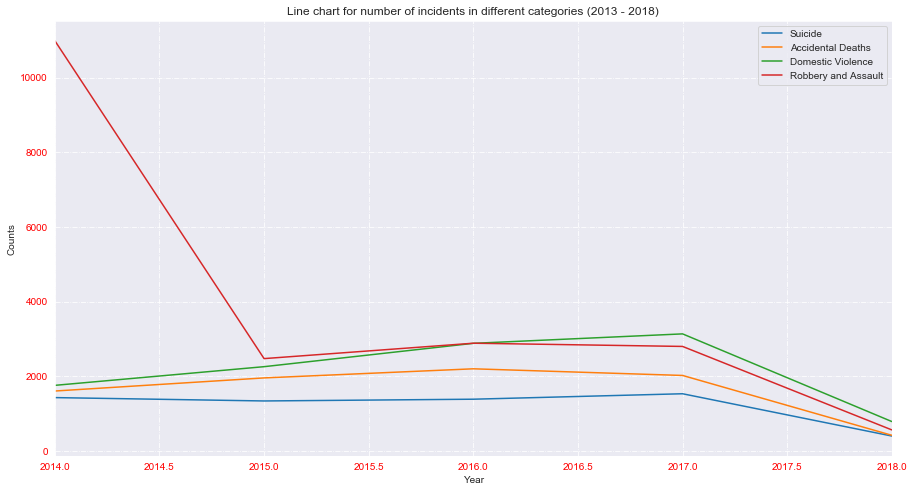

In [39]:
ax = year_incident.plot(figsize = (15,8))
ax.set(xlabel='Year')
ax.set(ylabel = "Counts")
ax.set(title = "Line chart for number of incidents in different categories (2013 - 2018)")
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

### Number of Shots
Let's sum up number of killed and number of injured in one new column in order to see which state has the most shots 

In [40]:
# sum up n_killed and n_injured into new column
gun_data["Total shots"] = gun_data.iloc[:,5:7].sum(axis = 1)
gun_data

export_csv = gun_data.to_csv('gun_violence_data.csv', sep='\t', encoding='utf-8')

In [41]:
shots = gun_data.groupby(["state"])["Total shots"].sum()
shots = pd.DataFrame(shots)
shots.sort_values(by = ["Total shots"],ascending = False)

,Total shots
state,
Illinois,16923
California,13206
Texas,11152
Florida,10981
Ohio,8211
Pennsylvania,7451
North Carolina,6854
New York,6764
Louisiana,6577


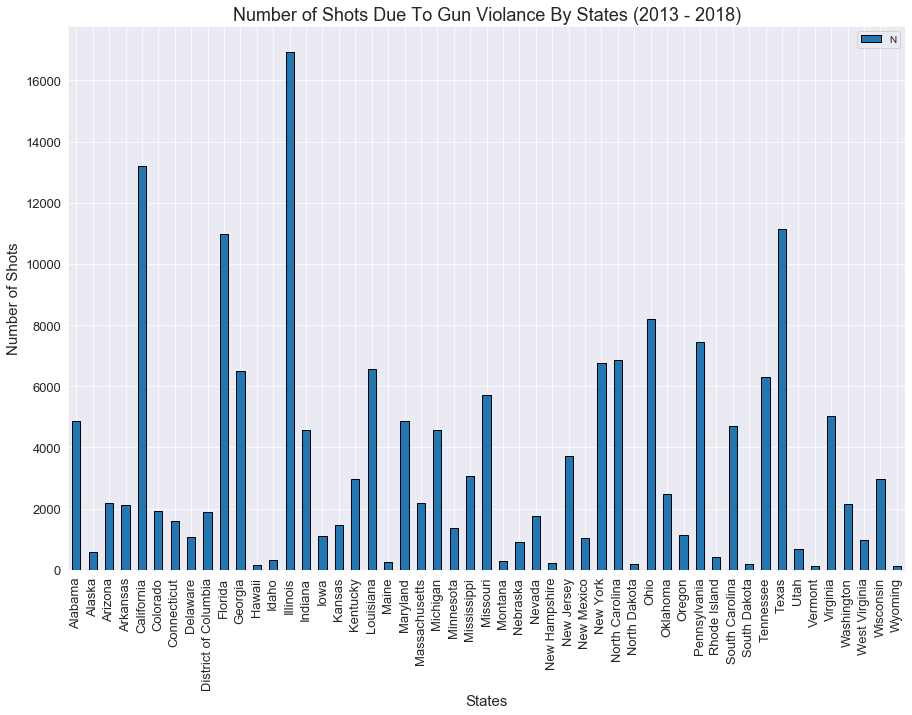

<Figure size 432x288 with 0 Axes>

In [42]:
# Create a bar chart based off of the group series from before
sns.set_style('darkgrid')
shots = shots.plot(kind = 'bar', width = 0.5, align = 'center', edgecolor = 'black',
                                     figsize = (15,10))
opacity = 0.8
tail = (10)

# Set the x-label and y-label
plt.legend("Number of Injured")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("States",fontsize = 15)
plt.ylabel("Number of Shots",fontsize = 15)
plt.title("Number of Shots Due To Gun Violance By States (2013 - 2018)",fontsize = 18)
ax.tick_params(labelcolor='r', labelsize='medium', width=3)


plt.show()
plt.tight_layout()

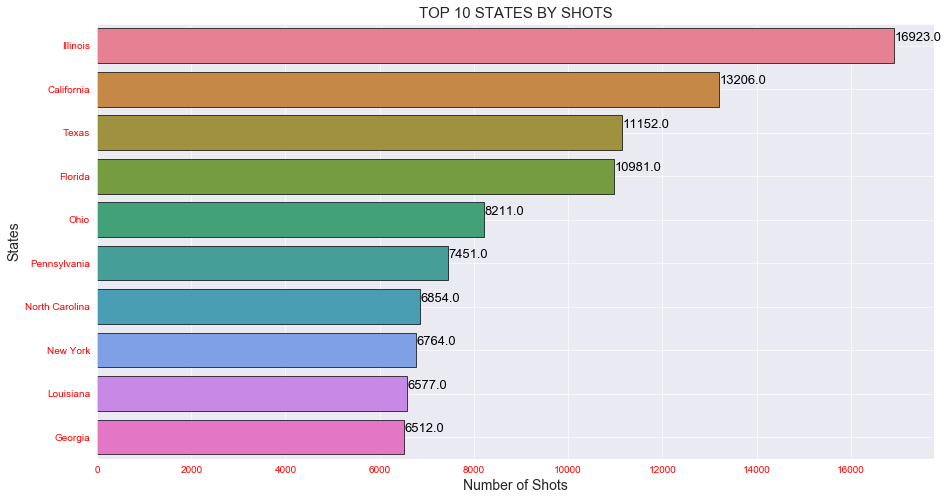

In [43]:
shots_states = gun_data.groupby("state")["Total shots"].sum().reset_index().sort_values(by="Total shots",ascending=False)

fig = plt.figure(figsize = (15,8))
ax = sns.barplot("Total shots","state",
                 data=shots_states[:10],palette="husl",linewidth=0.7,edgecolor = "k")
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.ylabel("States",fontsize=14)
plt.xlabel("Number of Shots",fontsize=14)
plt.subplots_adjust(wspace=.3)
plt.title("TOP 10 STATES BY SHOTS",fontsize=15)
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+.28, \
           str(round((i.get_width()),1 )), fontsize = 13,color = "black")
plt.grid(True,alpha= .8)
plt.savefig('top_10_shots.png')

## Cleaning data for yearly calculation

In [44]:
data_clean = gun_data.drop(columns ={"incident_id","incident_characteristics","gun_type","participant_status",
                                    "participant_type","participant_name",
                                    "participant_gender","n_guns_involved","participant_age_group",
                                    "participant_age","notes","location_description"})
data_clean
data_clean.to_csv('data_clean_complete.csv', encoding='utf-8')

In [45]:
year_group=data_clean.groupby(["year"])["n_killed","n_injured",].sum()
year = pd.DataFrame(year_group)
year_numbers = year.drop([2013,2018]).reset_index()
year_numbers.to_csv('yearly_numbers.csv', encoding='utf-8')